### C S 329E HW 4

## Pair Programming Group Number: FILL IN HERE
## Members of Team: Hyeon Gu Kim

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [3]:
train_df = pd.read_csv("melb_tree_train.csv")
df_X = train_df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',\
                'CouncilArea']]
s_y = train_df['Type']
print("Length of df_X: {} \nLength of s_y: {}".format(df_X.shape[0], s_y.shape[0]))

Length of df_X: 810 
Length of s_y: 810


## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [4]:
# calc_entropy(s_y) definition
def calc_entropy(s_y):
    val_counts = len(s_y.value_counts())
    total = sum(s_y.value_counts())
    entropy = 0
    for i in range(0, val_counts):
        a = s_y.value_counts().iloc[i]
        entropy += (-(a/total)*log2(a/total))
    return entropy

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [5]:
# The entire data set
print("Entropy of the entire data set: {}".format(calc_entropy(s_y)))

Entropy of the entire data set: 1.582533311426178


In [6]:
# Less than or equal to 200
landType_df = train_df[['Landsize', 'Type']].sort_values(by='Landsize')
lessThan200 = landType_df.loc[landType_df['Landsize'] <= 200]
print("Entropy of partition where Landsize is less than 200: {}".format(calc_entropy(lessThan200['Type'])))

Entropy of partition where Landsize is less than 200: 1.3456432116206725


In [7]:
# Between 200 and 450
btw200And450 = landType_df.loc[ landType_df['Landsize'].gt(200) & landType_df['Landsize'].le(450) ]
print("Entropy of partition where Landsize is between 200 and 450: {}".format(calc_entropy(btw200And450['Type'])))

Entropy of partition where Landsize is between 200 and 450: 1.4660501816027975


In [8]:
# greater than 450
greaterThan450 = landType_df.loc[ landType_df['Landsize'].gt(450) ]
print("Entropy of partition where Landsize is greater than 450: {}".format(calc_entropy(greaterThan450['Type'])))

Entropy of partition where Landsize is greater than 450: 1.09954792005911


## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [9]:
def calc_gini( s_y ):
    val_counts = len(s_y.value_counts())
    total = sum(s_y.value_counts())
    p = 0
    for i in range(0, val_counts):
        a = s_y.value_counts().iloc[i]
        p += ((a/total)**2)
    gini = 1 - p
    return gini

In [10]:
s_y.value_counts().iloc[2]

248

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [11]:
# The entire data set
print("Gini index of the entire data set: {}".format(calc_gini(s_y)))

Gini index of the entire data set: 0.6655601280292638


In [12]:
# Less than or equal to 200
lessThan200Gini = landType_df.loc[landType_df['Landsize'] <= 200]
print("Gini index of partition where Landsize is less than 200: {}".format(calc_gini(lessThan200Gini['Type'])))

Gini index of partition where Landsize is less than 200: 0.5741211482422965


In [13]:
# Between 200 and 450
btw200And450Gini = landType_df.loc[ landType_df['Landsize'].gt(200) & landType_df['Landsize'].le(450) ]
print("Gini index of partition where Landsize is between 200 and 450: {}".format(calc_gini(btw200And450Gini['Type'])))

Gini index of partition where Landsize is between 200 and 450: 0.6101021682602731


In [14]:
# greater than 450
greaterThan450Gini = landType_df.loc[ landType_df['Landsize'].gt(450) ]
print("Gini index of partition where Landsize is greater than 450: {}".format(calc_gini(greaterThan450Gini['Type'])))

Gini index of partition where Landsize is greater than 450: 0.43819341715976323


## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [15]:
# One Hot Encoding
encoded_train_df = pd.get_dummies(train_df, columns=['Type', 'CouncilArea'])

In [16]:
# Create Tree
train_x = encoded_train_df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', \
          'CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank', \
           'CouncilArea_Darebin', 'CouncilArea_Glen Eira', 'CouncilArea_Hobsons Bay', 'CouncilArea_Hume', \
           'CouncilArea_Kingston', 'CouncilArea_Knox', 'CouncilArea_Manningham', 'CouncilArea_Maribyrnong', \
           'CouncilArea_Melbourne', 'CouncilArea_Monash', 'CouncilArea_Moonee Valley', 'CouncilArea_Moreland', \
           'CouncilArea_Port Phillip', 'CouncilArea_Stonnington', 'CouncilArea_Whitehorse', 'CouncilArea_Wyndham', \
           'CouncilArea_Yarra']]
train_y = encoded_train_df[['Type_h', 'Type_t', 'Type_u']]
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(train_x, train_y)

[Text(167.4, 190.26, 'X[7] <= 99.5\nentropy = 0.917\nsamples = 810\nvalue = [[562, 248]\n[529, 281]\n[529, 281]]'),
 Text(83.7, 135.9, 'X[6] <= 76.0\nentropy = 0.666\nsamples = 291\nvalue = [[257, 34]\n[245, 46]\n[80, 211]]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 81.5\nentropy = 0.258\nsamples = 141\nvalue = [[140, 1]\n[132, 9]\n[10, 131]]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.128\nsamples = 102\nvalue = [[102, 0]\n[99, 3]\n[3, 99]]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.49\nsamples = 39\nvalue = [[38, 1]\n[33, 6]\n[7, 32]]'),
 Text(125.55000000000001, 81.53999999999999, 'X[8] <= 1957.5\nentropy = 0.854\nsamples = 150\nvalue = [[117, 33]\n[113, 37]\n[70, 80]]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.693\nsamples = 36\nvalue = [[12, 24]\n[34, 2]\n[26, 10]]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.75\nsamples = 114\nvalue = [[105, 9]\n[79, 35]\n[44, 70]]'),
 Text(251.10000000000002, 135.9, 'X[8] <= 1976.5\nentropy = 0.847\nsample

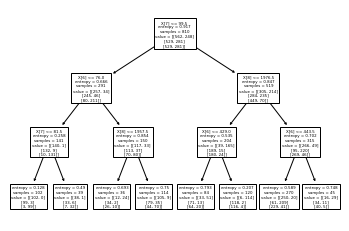

In [17]:
# Display text version of the tree
tree.plot_tree(clf) 

In [18]:
tree.export_text(clf)

'|--- feature_7 <= 99.50\n|   |--- feature_6 <= 76.00\n|   |   |--- feature_7 <= 81.50\n|   |   |   |--- class: 0\n|   |   |--- feature_7 >  81.50\n|   |   |   |--- class: 0\n|   |--- feature_6 >  76.00\n|   |   |--- feature_8 <= 1957.50\n|   |   |   |--- class: 1\n|   |   |--- feature_8 >  1957.50\n|   |   |   |--- class: 0\n|--- feature_7 >  99.50\n|   |--- feature_8 <= 1976.50\n|   |   |--- feature_6 <= 429.00\n|   |   |   |--- class: 1\n|   |   |--- feature_6 >  429.00\n|   |   |   |--- class: 1\n|   |--- feature_8 >  1976.50\n|   |   |--- feature_6 <= 443.50\n|   |   |   |--- class: 0\n|   |   |--- feature_6 >  443.50\n|   |   |   |--- class: 2\n'

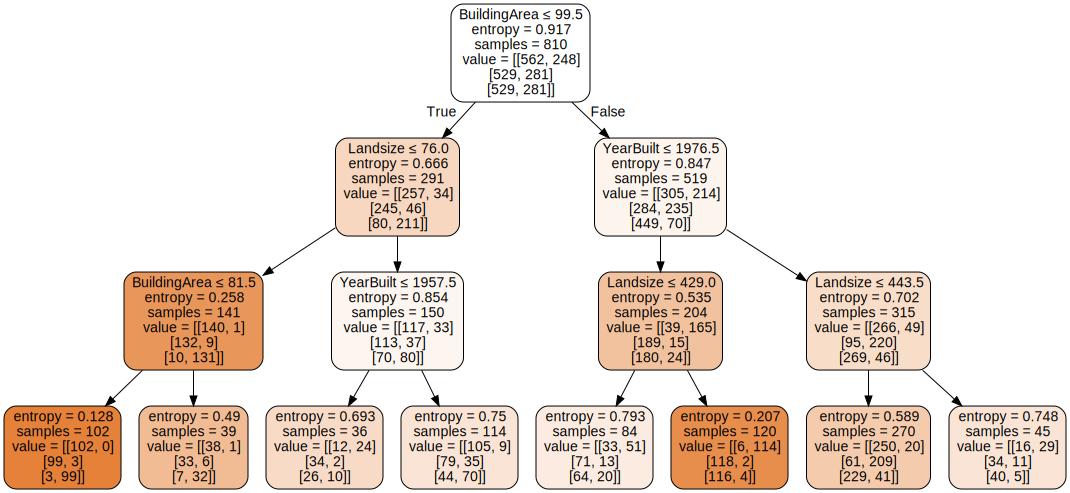

In [19]:
# Display graphviz version of the tree
dot_tree = tree.export_graphviz(clf, out_file=None, feature_names=train_x.columns, \
                                class_names=train_y.columns, filled=True, rounded=True, \
                                special_characters=True) 
graph = graphviz.Source(dot_tree)  
graph.render("melb") 
graph 

➡️ We can observe that there are three attributes in the tree: BuilgdingArea, Landsize, YearBuilt. The first thing that the tree uses BuilgdingArea as it's parent node classifier. Notice that the sample size and entropy get decreased as the tree grows. The leaf nodes tell us the most important insights. For example, those with BuildingArea less than equal to 81.5 and Landsize less than equal to 76.0 have the lowest (purest) entropy with sample size of 102. It predicts that Type would be "u" which most likely to be 1 (3 vs 99). It is interesting that the tree examine BuildingArea twice when BuildingArea <= 99.5 and Landsize <= 76.0. Notice that the sum of each inner list in each value equals to the node's sample size. It is also interesting that when BuildingArea > 99.5 and YearBuilt is either less than 1976.5 or greater than 1976.5, the Landsize is a sole classifier attribute.  ⬅️

## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [20]:
# Load in the test data
test_df = pd.read_csv("melb_tree_test.csv")
test_df = pd.get_dummies(test_df, columns=['Type', 'CouncilArea'])
test_x = test_df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', \
          'CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank', \
           'CouncilArea_Darebin', 'CouncilArea_Glen Eira', 'CouncilArea_Hobsons Bay', 'CouncilArea_Hume', \
           'CouncilArea_Kingston', 'CouncilArea_Knox', 'CouncilArea_Manningham', 'CouncilArea_Maribyrnong', \
           'CouncilArea_Melbourne', 'CouncilArea_Monash', 'CouncilArea_Moonee Valley', 'CouncilArea_Moreland', \
           'CouncilArea_Port Phillip', 'CouncilArea_Stonnington', 'CouncilArea_Whitehorse', 'CouncilArea_Wyndham', \
           'CouncilArea_Yarra']]
test_y = test_df[['Type_h', 'Type_t', 'Type_u']]


In [21]:
def error_rate(train_x, train_y, xTest, crit):
    err_lst = []
    for i in np.arange(2, 16): 
        error_sum = 0
        total_predict = 0
        clf = tree.DecisionTreeClassifier(criterion=crit, max_depth=i) #new tree with new max depth
        clf = clf.fit(train_x, train_y)
        y_hat = clf.predict(xTest)
        for row in range(len(y_hat)):
            total_predict += 1
            if ''.join(map(str, train_y.to_numpy()[row])) != ''.join(map(str, y_hat[row])):
                error_sum += 1
        err_lst.append(error_sum/total_predict)
    return err_lst
    '''
    print("Tree with " + crit + ": ")
    for j in np.arange(2, 16): 
        print("Error Rate of a tree with max depth of {}: {}".format(j, err_lst[2-j]))
    '''

In [22]:
train_err_gini = pd.Series(error_rate(train_x, train_y, train_x, "gini"), index=np.arange(2, 16))
test_err_gini = pd.Series(error_rate(test_x, test_y, test_x, "gini"), index=np.arange(2, 16))
train_err_ent = pd.Series(error_rate(train_x, train_y, train_x, "entropy"), index=np.arange(2, 16))
test_err_ent = pd.Series(error_rate(test_x, test_y, test_x, "entropy"), index=np.arange(2, 16))

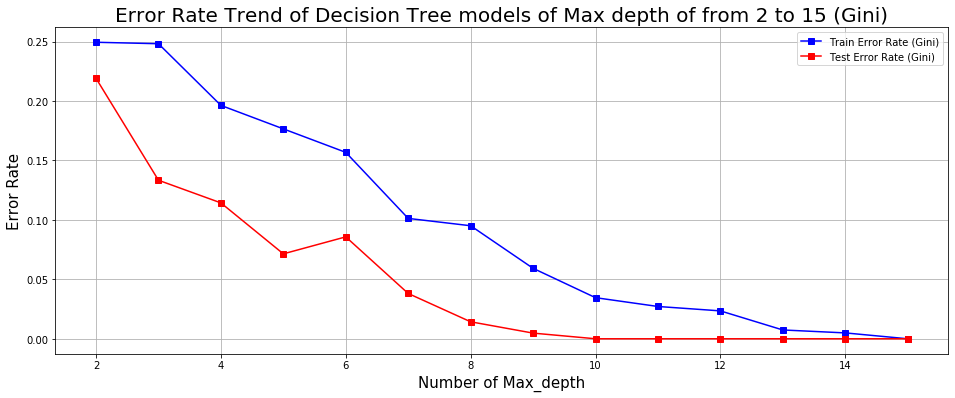

In [23]:
# Plot the 4 learning curves
plt.figure(figsize=(16,6))
plt.grid()
plt.plot(train_err_gini.index, train_err_gini.values, 'bs-', data=train_err_gini, label="Train Error Rate (Gini)")
plt.plot(test_err_gini.index, test_err_gini.values, 'rs-', data=test_err_gini, label="Test Error Rate (Gini)")
plt.xlabel("Number of Max_depth",  fontsize=15)
plt.ylabel("Error Rate",  fontsize=15)
plt.title("Error Rate Trend of Decision Tree models of Max depth of from 2 to 15 (Gini)", fontsize=20)
plt.legend()

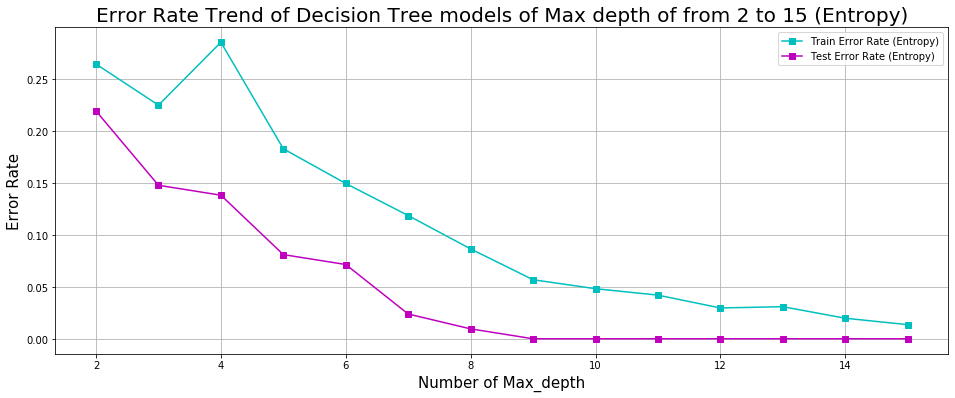

In [24]:
plt.figure(figsize=(16,6))
plt.grid()
plt.plot(train_err_ent, 'cs-', data=train_err_ent, label="Train Error Rate (Entropy)")
plt.plot(test_err_ent, 'ms-', data=test_err_ent, label="Test Error Rate (Entropy)")
plt.xlabel("Number of Max_depth",  fontsize=15)
plt.ylabel("Error Rate",  fontsize=15)
plt.title("Error Rate Trend of Decision Tree models of Max depth of from 2 to 15 (Entropy)", fontsize=20)
plt.legend()

➡️ As the number of max depth increases, we can observe that the error rate decreases - so the graphs show negative trend (or slope). The trend of train graph indicates it will reach to zero erro rate soon (probably after 3~4 additional max_depth). Since the test graphs already reached to zero error rate, there would be no need to increase number of max_depth more than 10. The test error rate reaches zero at max depth of 10 in Gini graph and 9 in Entropy graph. We can see both the test graphs are lower than its train graphs. This is probably because the train graphs' amount of inputed data is much greater than that of test graphs (810 vs 210 rows) ⬅️